<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Multivariate_Time_Series_Modeling_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import scipy
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import pandas as pd
import numpy as np
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('2014_Prep.csv')

In [ ]:
df

,Unnamed: 0,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,season,Date_time,TS1_P1_data,Wx,Wy
0,1831,24,1015,35,24,62,Autumn,3/1/2014 6:31,18,3858.922981,13457.663743
1,1832,24,1015,35,24,67,Autumn,3/1/2014 6:32,16,2494.940290,11737.771209
2,1833,24,1015,35,24,69,Autumn,3/1/2014 6:33,12,5817.715443,10495.436486
3,1834,24,1015,35,24,72,Autumn,3/1/2014 6:34,14,4702.282018,6472.135955
4,1835,24,1015,35,24,76,Autumn,3/1/2014 6:35,10,4901.751315,7548.035112
...,...,...,...,...,...,...,...,...,...,...,...
131234,428107,18,1017,60,17,18,Spring,11/12/2014 18:30,12,-8950.697058,940.756169
131235,428108,18,1017,60,17,16,Spring,11/12/2014 18:31,9,-7995.126616,279.195974
131236,428109,18,1017,60,17,14,Spring,11/12/2014 18:32,8,-5967.131372,-627.170780
131237,428110,18,1017,60,17,14,Spring,11/12/2014 18:33,4,-12000.342210,-7210.533049


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131239 entries, 0 to 131238
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   131239 non-null  int64  
 1   TS1_SENS0700_TmpMdul_C_data  131239 non-null  int64  
 2   Barometer_data               131239 non-null  int64  
 3   Outside_Humidity_data        131239 non-null  int64  
 4   Outside_Temperature_data     131239 non-null  int64  
 5   Solar_Radiation_data         131239 non-null  int64  
 6   season                       131239 non-null  object 
 7   Date_time                    131239 non-null  object 
 8   TS1_P1_data                  131239 non-null  int64  
 9   Wx                           131239 non-null  float64
 10  Wy                           131239 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 11.0+ MB


In [ ]:
df['Date_time'] = pd.to_datetime(df['Date_time'], infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c01c8b280>,
      dtype=object)

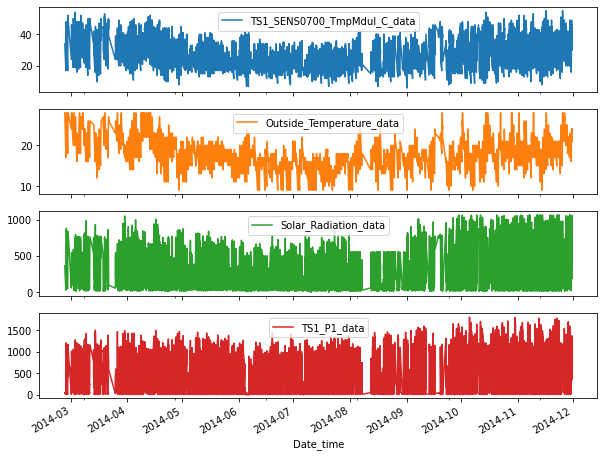

In [ ]:
df.set_index('Date_time')[['TS1_SENS0700_TmpMdul_C_data', 'Outside_Temperature_data','Solar_Radiation_data','TS1_P1_data']].plot(subplots=True)

In [ ]:
df.columns

Index(['Unnamed: 0', 'TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data', 'season', 'Date_time', 'TS1_P1_data', 'Wx',
       'Wy'],
      dtype='object')

In [ ]:
df=df[::5]
df

,Unnamed: 0,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,season,Date_time,TS1_P1_data,Wx,Wy
0,1831,24,1015,35,24,62,Autumn,2014-03-01 06:31:00,18,3858.922981,13457.663743
5,1836,24,1015,35,24,77,Autumn,2014-03-01 06:36:00,6,4000.000000,6928.203230
10,1841,24,1015,35,24,97,Autumn,2014-03-01 06:41:00,17,6022.175457,6688.303429
15,1846,26,1015,35,24,116,Autumn,2014-03-01 06:46:00,194,5162.187927,7372.368399
20,1851,30,1015,35,24,135,Autumn,2014-03-01 06:51:00,225,4473.543228,6632.300580
...,...,...,...,...,...,...,...,...,...,...,...
131215,428083,20,1017,58,17,90,Spring,2014-11-12 18:06:00,241,-16454.482672,-9500.000000
131220,428088,21,1017,58,17,58,Spring,2014-11-12 18:11:00,66,-8668.118290,-6772.276229
131225,428095,19,1017,57,17,26,Spring,2014-11-12 18:18:00,6,-5996.344962,209.396980
131230,428102,18,1017,59,17,21,Spring,2014-11-12 18:25:00,4,-14722.431864,-8500.000000


In [ ]:
date_time = pd.to_datetime(df.pop('Date_time'), format='%d/%m/%Y %H:%M')
date_time

0        2014-03-01 06:31:00
5        2014-03-01 06:36:00
10       2014-03-01 06:41:00
15       2014-03-01 06:46:00
20       2014-03-01 06:51:00
                 ...        
131215   2014-11-12 18:06:00
131220   2014-11-12 18:11:00
131225   2014-11-12 18:18:00
131230   2014-11-12 18:25:00
131235   2014-11-12 18:31:00
Name: Date_time, Length: 26248, dtype: datetime64[ns]

In [ ]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [ ]:
import numpy as np
day = 24*60*5
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

<ipython-input-11-1fe7526918b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
<ipython-input-11-1fe7526918b2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
<ipython-input-11-1fe7526918b2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [ ]:
df.columns

Index(['Unnamed: 0', 'TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data', 'season', 'TS1_P1_data', 'Wx', 'Wy', 'Day sin',
       'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

In [ ]:
df_input =df[['TS1_P1_data','TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data','Wx','Wy', 'Day sin','Day cos','Year sin', 'Year cos']]

In [ ]:
df_input.shape

(26248, 12)

In [ ]:
df_input= df_input.loc[df['TS1_P1_data']<=1150]

In [ ]:
df_input.shape

(23918, 12)

In [ ]:
df_input= df_input.loc[df['TS1_P1_data']>50]

In [ ]:
df_input.shape

(23131, 12)

In [ ]:
df_input.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
TS1_P1_data,0.055418,-1.414757
TS1_SENS0700_TmpMdul_C_data,0.145504,-0.516661
Barometer_data,0.088393,-0.279789
Outside_Humidity_data,-0.035501,-0.397424
Outside_Temperature_data,0.179216,0.010756
Solar_Radiation_data,0.656694,-0.225040
Wx,0.178121,-0.030943
Wy,-0.002839,-0.099547
Day sin,-0.019219,-1.497920
Day cos,-0.012573,-1.497594


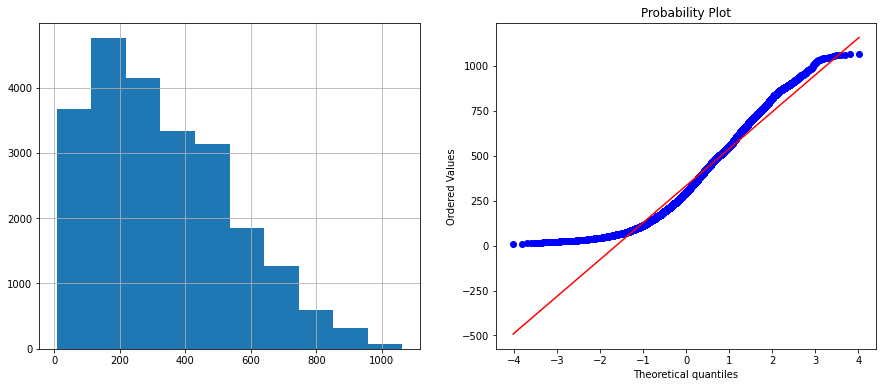

In [ ]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()
diagnostic_plots(df_input,'Solar_Radiation_data')

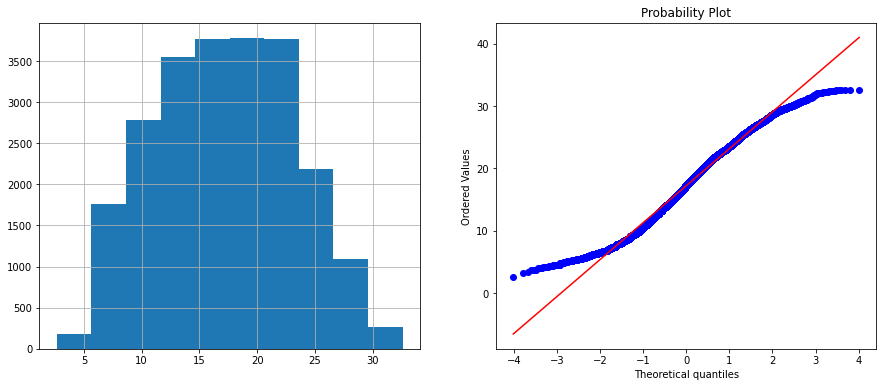

In [ ]:
df_input['Solar_Radiation_data_SQ']=df_input.Solar_Radiation_data**(1/2)
diagnostic_plots(df_input,'Solar_Radiation_data_SQ')

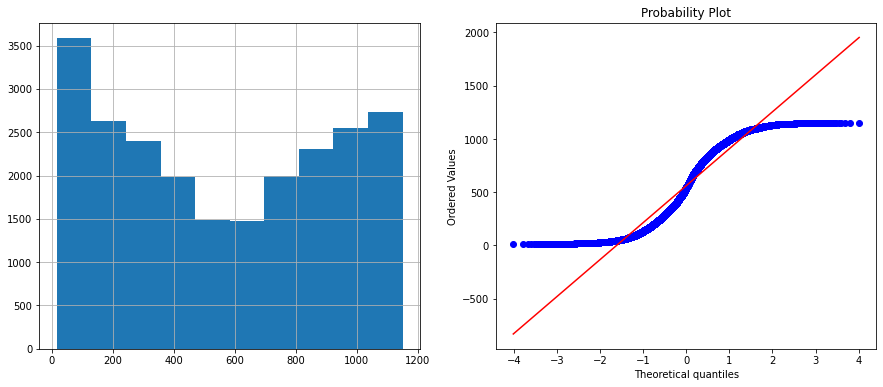

In [ ]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()
diagnostic_plots(df_input,'TS1_P1_data')

In [ ]:
df_input.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
TS1_P1_data,0.055418,-1.414757
TS1_SENS0700_TmpMdul_C_data,0.145504,-0.516661
Barometer_data,0.088393,-0.279789
Outside_Humidity_data,-0.035501,-0.397424
Outside_Temperature_data,0.179216,0.010756
Solar_Radiation_data,0.656694,-0.225040
Wx,0.178121,-0.030943
Wy,-0.002839,-0.099547
Day sin,-0.019219,-1.497920
Day cos,-0.012573,-1.497594


In [ ]:
df_input =df_input[['TS1_P1_data','TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data_SQ','Wx','Wy', 'Day sin','Day cos','Year sin', 'Year cos']]

In [ ]:
df_input

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data_SQ,Wx,Wy,Day sin,Day cos,Year sin,Year cos
0,18,24,1015,35,24,7.874008,3858.922981,13457.663743,0.998630,-0.052336,-0.259620,0.965711
10,17,24,1015,35,24,9.848858,6022.175457,6688.303429,0.838671,-0.544639,-0.258236,0.966082
15,194,26,1015,35,24,10.770330,5162.187927,7372.368399,0.669131,-0.743145,-0.257543,0.966267
20,225,30,1015,35,24,11.618950,4473.543228,6632.300580,0.453990,-0.891007,-0.256850,0.966451
25,238,32,1015,35,24,12.489996,4769.273378,7632.432865,0.207912,-0.978148,-0.256158,0.966635
...,...,...,...,...,...,...,...,...,...,...,...,...
131200,62,20,1017,60,17,8.062258,-15147.110911,-7717.838496,-0.500000,0.866025,0.663460,-0.748212
131205,53,20,1017,59,17,7.141428,-7794.960518,-1799.608435,-0.258819,0.965926,0.662924,-0.748687
131210,148,20,1017,57,17,9.110434,-16628.509212,-3534.498744,0.052336,0.998630,0.662279,-0.749257
131215,241,20,1017,58,17,9.486833,-16454.482672,-9500.000000,0.309017,0.951057,0.661742,-0.749731


In [ ]:
df_input.describe()

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data_SQ,Wx,Wy,Day sin,Day cos,Year sin,Year cos
count,23131.000000,23131.000000,23131.000000,23131.000000,23131.000000,23131.000000,23131.000000,23131.000000,2.313100e+04,2.313100e+04,23131.000000,23131.000000
mean,560.943928,29.597856,1018.317496,65.252907,18.457741,17.239766,194.718185,1526.840084,8.563965e-03,6.186213e-03,-0.020094,0.034527
std,360.536105,8.036582,5.560788,14.882036,3.697485,5.959795,6843.314885,5225.821288,7.071771e-01,7.069881e-01,0.692939,0.719919
min,16.000000,8.000000,1003.000000,24.000000,9.000000,2.645751,-20251.106776,-11276.311449,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000
25%,225.000000,24.000000,1014.000000,55.000000,16.000000,12.649111,-4285.836504,-565.809945,-7.071068e-01,-7.071068e-01,-0.701450,-0.701978
50%,540.000000,29.000000,1018.000000,65.000000,18.000000,17.233688,0.000000,837.375300,9.696413e-11,7.391457e-11,-0.025952,0.083490
75%,901.000000,35.000000,1022.000000,75.000000,21.000000,21.863211,4829.629131,5017.151294,7.071068e-01,7.071068e-01,0.645154,0.764023
max,1150.000000,55.000000,1033.000000,98.000000,28.000000,32.603681,19923.893962,14868.535021,1.000000e+00,1.000000e+00,1.000000,1.000000


In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [ ]:
data_scaled

array([[1.76366843e-03, 3.40425532e-01, 4.00000000e-01, ...,
        4.73832022e-01, 3.70189812e-01, 9.82855381e-01],
       [8.81834215e-04, 3.40425532e-01, 4.00000000e-01, ...,
        2.27680482e-01, 3.70882149e-01, 9.83040976e-01],
       [1.56966490e-01, 3.82978723e-01, 4.00000000e-01, ...,
        1.28427587e-01, 3.71228418e-01, 9.83133402e-01],
       ...,
       [1.16402116e-01, 2.55319149e-01, 4.66666667e-01, ...,
        9.99314767e-01, 8.31139750e-01, 1.25371555e-01],
       [1.98412698e-01, 2.55319149e-01, 4.66666667e-01, ...,
        9.75528258e-01, 8.30871138e-01, 1.25134296e-01],
       [4.40917108e-02, 2.76595745e-01, 4.66666667e-01, ...,
        9.19335284e-01, 8.30602356e-01, 1.24897230e-01]])

In [ ]:
features=data_scaled
target=data_scaled[:,0]

In [ ]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[1.76366843e-03, 3.40425532e-01, 4.00000000e-01, 1.48648649e-01,
          7.89473684e-01, 1.74519957e-01, 6.00125185e-01, 9.46036353e-01,
          9.99314767e-01, 4.73832022e-01, 3.70189812e-01, 9.82855381e-01],
         [8.81834215e-04, 3.40425532e-01, 4.00000000e-01, 1.48648649e-01,
          7.89473684e-01, 2.40440732e-01, 6.53970921e-01, 6.87118775e-01,
          9.19335284e-01, 2.27680482e-01, 3.70882149e-01, 9.83040976e-01]]]),
 array([0.15696649]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [ ]:
x_train.shape

(18504, 12)

In [ ]:
x_test.shape

(4627, 12)

In [ ]:
win_length=720
batch_size=32
num_features=12
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [ ]:
train_generator[0]

(array([[[1.76366843e-03, 3.40425532e-01, 4.00000000e-01, ...,
          4.73832022e-01, 3.70189812e-01, 9.82855381e-01],
         [8.81834215e-04, 3.40425532e-01, 4.00000000e-01, ...,
          2.27680482e-01, 3.70882149e-01, 9.83040976e-01],
         [1.56966490e-01, 3.82978723e-01, 4.00000000e-01, ...,
          1.28427587e-01, 3.71228418e-01, 9.83133402e-01],
         ...,
         [3.26278660e-01, 5.31914894e-01, 5.00000000e-01, ...,
          9.19335284e-01, 5.29600127e-01, 9.99123066e-01],
         [6.97530864e-01, 5.31914894e-01, 5.00000000e-01, ...,
          9.89073800e-01, 5.30100980e-01, 9.99093111e-01],
         [7.48677249e-01, 5.31914894e-01, 5.00000000e-01, ...,
          9.99314767e-01, 5.30458713e-01, 9.99071407e-01]],
 
        [[8.81834215e-04, 3.40425532e-01, 4.00000000e-01, ...,
          2.27680482e-01, 3.70882149e-01, 9.83040976e-01],
         [1.56966490e-01, 3.82978723e-01, 4.00000000e-01, ...,
          1.28427587e-01, 3.71228418e-01, 9.83133402e-01],
       

In [ ]:
from keras.regularizers import L1L2
model = tf.keras.Sequential()
model.add(Bidirectional(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True)))#,kernel_regularizer = L1L2(l1=0.02, l2=0.00)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MAPE])

history = model.fit_generator(train_generator, epochs=5,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

<ipython-input-37-49d8a18870f3>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=5,


Epoch 1/5
556/556 [==============================] - 113s 187ms/step - loss: 0.0498 - mean_absolute_percentage_error: 462283.9062 - val_loss: 0.0322 - val_mean_absolute_percentage_error: 125841.4453
Epoch 2/5
556/556 [==============================] - 97s 174ms/step - loss: 0.0329 - mean_absolute_percentage_error: 302018.1250 - val_loss: 0.0321 - val_mean_absolute_percentage_error: 124386.6953
Epoch 3/5
556/556 [==============================] - 97s 174ms/step - loss: 0.0312 - mean_absolute_percentage_error: 265721.2188 - val_loss: 0.0308 - val_mean_absolute_percentage_error: 113594.7344
Epoch 4/5
556/556 [==============================] - 101s 181ms/step - loss: 0.0303 - mean_absolute_percentage_error: 262810.3125 - val_loss: 0.0298 - val_mean_absolute_percentage_error: 117775.6875
Epoch 5/5
556/556 [==============================] - 97s 175ms/step - loss: 0.0296 - mean_absolute_percentage_error: 239544.7812 - val_loss: 0.0315 - val_mean_absolute_percentage_error: 121261.3438


In [ ]:
model.evaluate_generator(test_generator, verbose=0)  

<ipython-input-38-ef1e1eabfd74>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.03153138607740402, 121261.34375]

In [ ]:
predictions=model.predict_generator(test_generator)

<ipython-input-39-6ca49477046f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


In [ ]:
predictions.shape[0]

3907

In [ ]:
predictions

array([[0.5172206 ],
       [0.4578551 ],
       [0.56885237],
       ...,
       [0.12352116],
       [0.16319335],
       [0.21375799]], dtype=float32)

In [ ]:
y_test

array([0.5361552 , 0.1957672 , 0.16666667, ..., 0.11640212, 0.1984127 ,
       0.04409171])

In [ ]:
x_test

array([[0.5361552 , 0.59574468, 0.4       , ..., 0.37059048, 0.9691815 ,
        0.32717429],
       [0.1957672 , 0.65957447, 0.4       , ..., 0.12842759, 0.96890839,
        0.32643465],
       [0.16666667, 0.40425532, 0.4       , ..., 0.04322727, 0.96875893,
        0.32603139],
       ...,
       [0.11640212, 0.25531915, 0.46666667, ..., 0.99931477, 0.83113975,
        0.12537155],
       [0.1984127 , 0.25531915, 0.46666667, ..., 0.97552826, 0.83087114,
        0.1251343 ],
       [0.04409171, 0.27659574, 0.46666667, ..., 0.91933528, 0.83060236,
        0.12489723]])

In [ ]:
x_test[:,1:][win_length:]

array([[0.40425532, 0.5       , 0.60810811, ..., 0.01703709, 0.1466944 ,
        0.14619897],
       [0.40425532, 0.5       , 0.59459459, ..., 0.00273905, 0.14633954,
        0.14655369],
       [0.44680851, 0.5       , 0.60810811, ..., 0.04322727, 0.14603566,
        0.14685802],
       ...,
       [0.25531915, 0.46666667, 0.44594595, ..., 0.99931477, 0.83113975,
        0.12537155],
       [0.25531915, 0.46666667, 0.45945946, ..., 0.97552826, 0.83087114,
        0.1251343 ],
       [0.27659574, 0.46666667, 0.45945946, ..., 0.91933528, 0.83060236,
        0.12489723]])

In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:
df_pred

,0,0,1,2,3,4,5,6,7,8,9,10
0,0.517221,0.404255,0.500000,0.608108,0.473684,0.502239,0.348455,0.183679,0.629410,0.017037,0.146694,0.146199
1,0.457855,0.404255,0.500000,0.594595,0.473684,0.641482,0.439242,0.141984,0.447736,0.002739,0.146340,0.146554
2,0.568852,0.446809,0.500000,0.608108,0.473684,0.693094,0.284770,0.015157,0.296632,0.043227,0.146036,0.146858
3,0.618146,0.638298,0.500000,0.554054,0.526316,0.336544,0.262424,0.161519,0.010926,0.603956,0.144722,0.148180
4,0.451442,0.595745,0.500000,0.540541,0.526316,0.732727,0.401913,0.000000,0.054497,0.726995,0.144470,0.148435
...,...,...,...,...,...,...,...,...,...,...,...,...
3902,0.165930,0.255319,0.466667,0.486486,0.421053,0.180804,0.127044,0.136106,0.250000,0.933013,0.831730,0.125894
3903,0.134202,0.255319,0.466667,0.472973,0.421053,0.150066,0.310047,0.362469,0.370590,0.982963,0.831462,0.125657
3904,0.123521,0.255319,0.466667,0.445946,0.421053,0.215792,0.090170,0.296112,0.526168,0.999315,0.831140,0.125372
3905,0.163193,0.255319,0.466667,0.459459,0.421053,0.228356,0.094502,0.067941,0.654508,0.975528,0.830871,0.125134


In [ ]:
rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
rev_trans

array([[ 6.02528179e+02,  2.70000000e+01,  1.01800000e+03, ...,
        -9.65925826e-01, -7.06611170e-01, -7.07602045e-01],
       [ 5.35207690e+02,  2.70000000e+01,  1.01800000e+03, ...,
        -9.94521895e-01, -7.07320889e-01, -7.06892608e-01],
       [ 6.61078582e+02,  2.90000000e+01,  1.01800000e+03, ...,
        -9.13545458e-01, -7.07928653e-01, -7.06283953e-01],
       ...,
       [ 1.56073000e+02,  2.00000000e+01,  1.01700000e+03, ...,
         9.98629535e-01,  6.62279490e-01, -7.49256883e-01],
       [ 2.01061253e+02,  2.00000000e+01,  1.01700000e+03, ...,
         9.51056516e-01,  6.61742266e-01, -7.49731401e-01],
       [ 2.58401563e+02,  2.10000000e+01,  1.01700000e+03, ...,
         8.38670568e-01,  6.61204702e-01, -7.50205534e-01]])

In [ ]:
predictions.shape

(3907, 1)

In [ ]:
df_final=df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

TS1_P1_data                    3907
TS1_SENS0700_TmpMdul_C_data    3907
Barometer_data                 3907
Outside_Humidity_data          3907
Outside_Temperature_data       3907
Solar_Radiation_data_SQ        3907
Wx                             3907
Wy                             3907
Day sin                        3907
Day cos                        3907
Year sin                       3907
Year cos                       3907
dtype: int64

In [ ]:
df_final['pred']=rev_trans[:,0]

<ipython-input-52-b1d36e152cae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pred']=rev_trans[:,0]


In [ ]:
dd=df_final[['TS1_P1_data','pred']]

In [ ]:
df_final.columns

Index(['TS1_P1_data', 'TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data_SQ', 'Wx', 'Wy', 'Day sin', 'Day cos', 'Year sin',
       'Year cos', 'pred'],
      dtype='object')

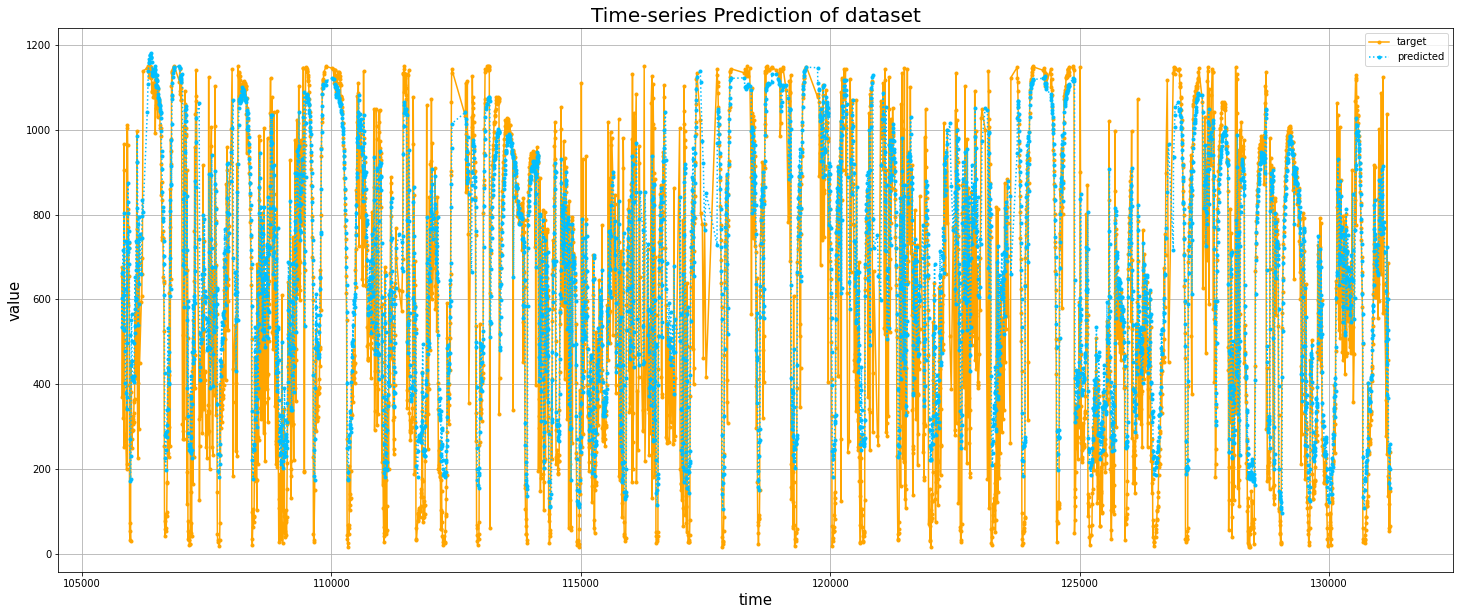

Prediction plot is saved to./predictionPlot.png


In [ ]:
#algorithm= net.name
plt.figure(figsize=(25,10))
targetPlot,=plt.plot(df_final.TS1_P1_data,label='target',color='orange',marker='.',linestyle='-')
predictedPlot,=plt.plot(df_final.pred,label='predicted',color='deepskyblue',marker='.',linestyle=':')
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('value',fontsize=15)
plt.xlabel('time',fontsize=15)
plt.ion()
plt.grid()
plt.legend(handles=[targetPlot, predictedPlot])
plt.title('Time-series Prediction of dataset',fontsize=20,fontweight=40)
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

In [ ]:
df_final

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data_SQ,Wx,Wy,Day sin,Day cos,Year sin,Year cos,pred
105800,370,27,1018,69,18,17.691806,-6251.925334,-6474.058203,0.258819,-0.965926,-0.706611,-0.707602,602.528179
105805,655,27,1018,68,18,21.863211,-2604.545236,-7564.148605,-0.104528,-0.994522,-0.707321,-0.706893,535.207690
105810,676,29,1018,69,18,23.409400,-8810.485475,-10880.043460,-0.406737,-0.913545,-0.707929,-0.706284,661.078582
105830,320,38,1018,65,19,12.727922,-9708.203932,-7053.423028,-0.978148,0.207912,-0.710556,-0.703640,716.977702
105835,536,36,1018,64,19,24.596748,-4104.241720,-11276.311449,-0.891007,0.453990,-0.711060,-0.703131,527.935299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131200,62,20,1017,60,17,8.062258,-15147.110911,-7717.838496,-0.500000,0.866025,0.663460,-0.748212,204.164657
131205,53,20,1017,59,17,7.141428,-7794.960518,-1799.608435,-0.258819,0.965926,0.662924,-0.748687,168.185123
131210,148,20,1017,57,17,9.110434,-16628.509212,-3534.498744,0.052336,0.998630,0.662279,-0.749257,156.073000
131215,241,20,1017,58,17,9.486833,-16454.482672,-9500.000000,0.309017,0.951057,0.661742,-0.749731,201.061253


In [ ]:
pred=df_final['pred']
power=df_final['TS1_P1_data']

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


def EV_prediction(y_test,y_pred):
  MSE=mean_squared_error(y_test,y_pred)
  MAE=mean_absolute_error(y_test,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
  R2 = r2_score(y_test,y_pred)
  MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
  print('Mean Absolute Error: {:.4f}'.format(MAE))
  print('Root Mean Square Error: {:.4f}'.format(RMSE))
  print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
  print('Mean Square Error: {:.4f}'.format(MSE))
  print('r_2 score:{:.4f}'.format(R2))
  print('MAPE score:{:.4f}'.format(MAPE))
  print('')

EV_prediction(pred, power)

Mean Absolute Error: 143.4283
Root Mean Square Error: 201.3653
Root Mean Square Error_LOG: 5.3051
Mean Square Error: 40547.9793
r_2 score:0.4769
MAPE score:29.3158

